In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import gmaps
import requests
import json
from config import gkey
from IPython.display import display
import ipywidgets as widgets
import calmap

In [3]:
london_csv = "CleanDatasets/london_AQI.csv"

In [4]:
london_data = pd.read_csv(london_csv)
london_data.head()

,date,pm25,pm10,o3,no2,so2,co,AQI
0,2019-01-02,49,22,23,26,1,8,49
1,2019-01-03,59,26,24,31,1,8,59
2,2019-01-04,55,39,16,31,1,10,55
3,2019-01-05,92,31,19,29,2,10,92
4,2019-01-06,81,29,14,31,2,10,81


In [6]:
london_data.reset_index()

,index,date,pm25,pm10,o3,no2,so2,co,AQI
0,0,2019-01-02,49,22,23,26,1,8,49
1,1,2019-01-03,59,26,24,31,1,8,59
2,2,2019-01-04,55,39,16,31,1,10,55
3,3,2019-01-05,92,31,19,29,2,10,92
4,4,2019-01-06,81,29,14,31,2,10,81
...,...,...,...,...,...,...,...,...,...
525,525,2020-07-09,46,13,18,12,4,5,46
526,526,2020-07-19,44,9,23,11,1,1,44
527,527,2020-07-23,50,19,39,26,1,1,50
528,528,2020-07-24,47,16,22,20,2,1,47


In [59]:
ld = pd.read_csv(london_csv)
ld.head()

,date,pm25,pm10,o3,no2,so2,co,AQI
0,2019-01-02,49,22,23,26,1,8,49
1,2019-01-03,59,26,24,31,1,8,59
2,2019-01-04,55,39,16,31,1,10,55
3,2019-01-05,92,31,19,29,2,10,92
4,2019-01-06,81,29,14,31,2,10,81


In [76]:
ld['date'] = ld['date'].dates.dt.strftime('%Y-%m-%d')

AttributeError: 'Series' object has no attribute 'dates'

In [60]:
ld[['year','month','day']] = ld['date'].str.split('-',expand=True)

In [61]:
ld.dtypes

date     object
pm25      int64
pm10      int64
o3        int64
no2       int64
so2       int64
co        int64
AQI       int64
year     object
month    object
day      object
dtype: object

In [62]:
ld['month'] = ld['month'].astype(str).astype(int)

In [71]:
ld['month'] = ld['month'].apply(lambda x: calendar.month_abbr[x])

In [72]:
ld['day'] = ld['day'].astype(str).astype('int64')

In [73]:
ld['year'] = ld['year'].astype(str).astype('int64')

In [74]:
ldaq = ld.pivot_table('AQI','month','day')

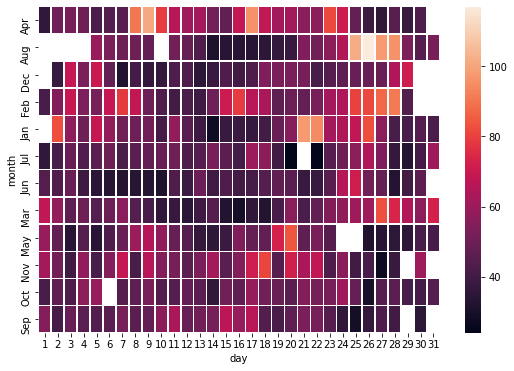

In [75]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(ldaq, annot=False, fmt="d", linewidths=.5, ax=ax)

In [32]:
london_data['date'] = london_data['date'].dates.dt.strftime('%Y-%m-%d')

AttributeError: 'Series' object has no attribute 'dates'

In [7]:
london_data[['year','month','day']] = london_data['date'].str.split('-',expand=True)

In [8]:
london_data['month'] = london_data['month'].astype(str).astype(int)

In [55]:
#london_data['month'] = london_data['month'].apply(lambda x: calendar.month_abbr[x])

In [56]:
london_data.head()

,date,pm25,pm10,o3,no2,so2,co,AQI,year,month,day
0,2019-01-02,49,22,23,26,1,8,49,2019,Jan,2
1,2019-01-03,59,26,24,31,1,8,59,2019,Jan,3
2,2019-01-04,55,39,16,31,1,10,55,2019,Jan,4
3,2019-01-05,92,31,19,29,2,10,92,2019,Jan,5
4,2019-01-06,81,29,14,31,2,10,81,2019,Jan,6


In [10]:
london_data['day'] = london_data['day'].astype(str).astype('int64')

In [11]:
london_data['year'] = london_data['year'].astype(str).astype('int64')

In [12]:
london_data['month'] = london_data['month'].astype(str).astype('category')

In [14]:
london = london_data.groupby('month')

In [16]:
london_dy = london['day']

In [19]:
london_aqi = london['AQI']

In [54]:
londonaq = london_data.pivot_table('month','day','AQI')

DataError: No numeric types to aggregate

In [22]:
london_month = london_data['month']
london_day = london_data['day']
london_AQI = london_data['AQI']

IndexError: Inconsistent shape between the condition and the input (got (530, 1) and (530,))

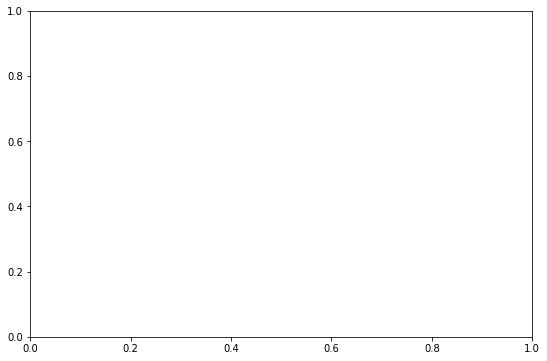

In [25]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(london_month, london_day, london_aqi, annot=False, fmt="f", linewidths=.5, ax=ax)

In [28]:
all_days = pd.date_range('1/02/2019', periods=700, freq='D')
days = london_day
events = london_AQI

In [30]:
calmap.yearplot(events, year=2019)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [35]:
# Target city
target_city = "London, England"

# Build the endpoint URL
target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(target_city, gkey)

In [36]:
# Run a request to endpoint and convert result to json
geo_data = requests.get(target_url).json()

# Print the json (pretty printed)
print(json.dumps(geo_data, indent=4, sort_keys=True))

{
    "results": [
        {
            "address_components": [
                {
                    "long_name": "London",
                    "short_name": "London",
                    "types": [
                        "locality",
                        "political"
                    ]
                },
                {
                    "long_name": "London",
                    "short_name": "London",
                    "types": [
                        "postal_town"
                    ]
                },
                {
                    "long_name": "Greater London",
                    "short_name": "Greater London",
                    "types": [
                        "administrative_area_level_2",
                        "political"
                    ]
                },
                {
                    "long_name": "England",
                    "short_name": "England",
                    "types": [
                        "administrative_area_leve

In [37]:
# Extract latitude and longitude
londonlat = geo_data["results"][0]["geometry"]["location"]["lat"]
londonlng = geo_data["results"][0]["geometry"]["location"]["lng"]

# Print the latitude and longitude
print('''
    City: {0}
    Latitude: {1}
    Longitude: {2}
    '''.format(target_city, londonlat, londonlng))


    City: London, England
    Latitude: 51.5073509
    Longitude: -0.1277583
    


In [38]:
london1 = london_data.assign(Latitude=londonlat)

In [39]:
london2 = london1.assign(Longitude=londonlng)
london2.head()

,date,pm25,pm10,o3,no2,so2,co,AQI,year,month,day,Latitude,Longitude
0,2019-01-02,49,22,23,26,1,8,49,2019,Jan,2,51.507351,-0.127758
1,2019-01-03,59,26,24,31,1,8,59,2019,Jan,3,51.507351,-0.127758
2,2019-01-04,55,39,16,31,1,10,55,2019,Jan,4,51.507351,-0.127758
3,2019-01-05,92,31,19,29,2,10,92,2019,Jan,5,51.507351,-0.127758
4,2019-01-06,81,29,14,31,2,10,81,2019,Jan,6,51.507351,-0.127758


In [40]:
london2.max()

date         2020-07-25
pm25                141
pm10                 58
o3                   73
no2                  62
so2                  14
co                   15
AQI                 141
year               2020
month               Sep
day                  31
Latitude        51.5074
Longitude     -0.127758
dtype: object

In [53]:
from IPython.display import display
import ipywidgets as widgets

import gmaps


class AQI_London(object):
    """
    Jupyter widget for exploring the ACLED dataset.

    The user uses the slider to choose a year. This renders
    a heatmap of civilian victims in that year.
    """

    def __init__(self, london2):
        self._london2 = london2
        self._heatmap = None
        self._slider = None
        initial_year = min(self._london2['year'])

        title_widget = widgets.HTML(
            '<h3>London AQI per year</h3>'
            '<h4>Data from <a href="https://aqicn.org/data-platform/register/">Air Quality Historical Data Platform</a></h4>'
        )

        map_figure = self._render_map(initial_year)
        controls = self._render_controls(initial_year)
        self._container = widgets.VBox([title_widget, controls, map_figure])

    def render(self):
        display(self._container)

    def _on_year_change(self, change):
        year = self._slider.value
        self._heatmap.locations = self._location_for_year(year)
        self._total_box.value = self._AQI_text_for_year(year)
        return self._container

    def _render_map(self, initial_year):
        fig = gmaps.figure(map_type='HYBRID')
        self._heatmap = gmaps.heatmap_layer(
            self._location_for_year(initial_year),
            max_intensity=141,
            point_radius=1.5
        )
        fig.add_layer(self._heatmap)
        return fig

    def _render_controls(self, initial_year):
        self._slider = widgets.IntSlider(
            value=initial_year,
            min=min(self._london2['year']),
            max=max(self._london2['year']),
            description='Year',
            continuous_update=False
        )
        self._total_box = widgets.Label(
            value=self._AQI_text_for_year(initial_year)
        )
        self._slider.observe(self._on_year_change, names='value')
        controls = widgets.HBox(
            [self._slider, self._total_box],
            layout={'justify_content': 'space-between'}
        )
        return controls

    def _location_for_year(self, year):
        return self._london2[self._london2['year'] == year][['Latitude', 'Longitude']]

    def _AQI_for_year(self, year):
        return int(self._london2[self._london2['AQI']])

    def _AQI_text_for_year(self, year):
        return '{} Air Quality Index'.format(self._AQI_for_year(year))


AQI_London(london2).render()

KeyError: "None of [Int64Index([49, 59, 55, 92, 81, 73, 60, 50, 46, 73,\n            ...\n            43, 44, 39, 35, 43, 46, 44, 50, 47, 45],\n           dtype='int64', length=530)] are in the [columns]"